In [1]:
#@title Getting the Dataset folder from Google Drive sing gdown
!pip install gdown
import gdown

# Folder URL
folder_url = "https://drive.google.com/drive/folders/1tYXOGJZqFljAyC6gqsSusHtDe2oh-PJo"
gdown.download_folder(folder_url, quiet=False)


Retrieving folder contents


Retrieving folder 1adgzdMm4dYgm21oUe2OWmb8qQBlAORCx input
Processing file 12S7hGkZ9F3M_2-OkHKeLnFHMve_V0_qf combined_faces_train_augmented.zip
Processing file 1HX6V3DsEtHFmI62ITV44YtnJYWdhR3A2 combined_faces.zip
Processing file 1tuXs3EqkifdPZhd9kKf1G2PLhh7jE94U images_filenames_labels_test.csv
Processing file 1J74ZxYzYXWJbz2Z3_2SWcGDU6c_D-aIr images_filenames_labels_train_augmented.csv
Retrieving folder 1AAO6O2cHq24IxbAkgtlkjfLuJTZuPXx0 output
Retrieving folder 1K100cFIqfDI-OTITnDLLrKXdxpgQNGEr cnn_logs
Retrieving folder 1RvUzNTdS1YeKDHY70VO7gjkGMkR7ouWi train
Retrieving folder 1-CYJPD9M05Wt3LQcuOOCtBR7S1Esrqwm plugins
Retrieving folder 1-LMwhmVtzuDGTF1rHnX6-8pLZ-UUnqPm profile
Retrieving folder 1-MWLWvzXF6UkPXrMIoUsm0N80BvKYB3C 2021_08_24_10_42_45
Processing file 1-UipZXwI-MkSQFYG5-tAtxCXkhr0EJpR ef94ef1d5b17.input_pipeline.pb
Processing file 1-NY2J-VqCp8GzioY_y4NMQErRSfc6hGi ef94ef1d5b17.kernel_stats.pb
Processing file 1-hJi-V-QfHGHfT9LpO3MPq6aErRCgNy4 ef94ef1d5b17.memory_profile.jso

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=12S7hGkZ9F3M_2-OkHKeLnFHMve_V0_qf
From (redirected): https://drive.google.com/uc?id=12S7hGkZ9F3M_2-OkHKeLnFHMve_V0_qf&confirm=t&uuid=b5186266-e94a-4084-8919-e2a40fc85e57
To: /content/1.1_age_input_output/input/combined_faces_train_augmented.zip
100%|██████████| 5.66G/5.66G [01:13<00:00, 76.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HX6V3DsEtHFmI62ITV44YtnJYWdhR3A2
From (redirected): https://drive.google.com/uc?id=1HX6V3DsEtHFmI62ITV44YtnJYWdhR3A2&confirm=t&uuid=1ccc32de-4fd9-4812-8fd8-d9c613fa88fc
To: /content/1.1_age_input_output/input/combined_faces.zip
100%|██████████| 283M/283M [00:02<00:00, 99.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tuXs3EqkifdPZhd9kKf1G2PLhh7jE94U
To: /content/1.1_age_input_output/input/images_filenames_labels_test.csv
100%|██████████| 467k/467k [00:0

['/content/1.1_age_input_output/input/combined_faces_train_augmented.zip',
 '/content/1.1_age_input_output/input/combined_faces.zip',
 '/content/1.1_age_input_output/input/images_filenames_labels_test.csv',
 '/content/1.1_age_input_output/input/images_filenames_labels_train_augmented.csv',
 '/content/1.1_age_input_output/output/cnn_logs/train/plugins/profile/2021_08_24_10_42_45/ef94ef1d5b17.input_pipeline.pb',
 '/content/1.1_age_input_output/output/cnn_logs/train/plugins/profile/2021_08_24_10_42_45/ef94ef1d5b17.kernel_stats.pb',
 '/content/1.1_age_input_output/output/cnn_logs/train/plugins/profile/2021_08_24_10_42_45/ef94ef1d5b17.memory_profile.json.gz',
 '/content/1.1_age_input_output/output/cnn_logs/train/plugins/profile/2021_08_24_10_42_45/ef94ef1d5b17.overview_page.pb',
 '/content/1.1_age_input_output/output/cnn_logs/train/plugins/profile/2021_08_24_10_42_45/ef94ef1d5b17.tensorflow_stats.pb',
 '/content/1.1_age_input_output/output/cnn_logs/train/plugins/profile/2021_08_24_10_42_45/

In [ ]:
#@title Unzipping the Train set from Google Drive
import zipfile
import os

# Path to your zip file
zip_path = "/content/drive/MyDrive/1.1_age_input_output/input/combined_faces.zip"

# Destination path to extract
extract_path = "/content"

# Create destination folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Extracted to: /content


In [ ]:
#@title unzipping the Test set from Google Drive
import zipfile
import os

# Path to your zip file
zip_path = "/content/1.1_age_input_output/input/combined_faces_train_augmented.zip"

# Destination path to extract
extract_path = "/content"

# Create destination folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Extracted to: /content


In [ ]:
#@title Importing necessary libraries For Age Estimation model training
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title load labels.csv and observe it
labels_train = pd.read_csv('/content/1.1_age_input_output/input/images_filenames_labels_train_augmented.csv')
labels_test = pd.read_csv('/content/1.1_age_input_output/input/images_filenames_labels_test.csv')
print(labels_test.shape)
print(labels_train.shape)
print(labels_test.head())
print(labels_train.head())

(10046, 2)
(234400, 2)
                                     filename  age
0   /content/content/combined_faces/8_163.jpg    8
1   /content/content/combined_faces/38_66.jpg   38
2  /content/content/combined_faces/40_177.jpg   40
3  /content/content/combined_faces/36_267.jpg   36
4   /content/content/combined_faces/8_349.jpg    8
                                            filename  age
0  /content/content/combined_faces_train_augmente...   43
1  /content/content/combined_faces_train_augmente...   71
2  /content/content/combined_faces_train_augmente...    6
3  /content/content/combined_faces_train_augmente...   18
4  /content/content/combined_faces_train_augmente...   25


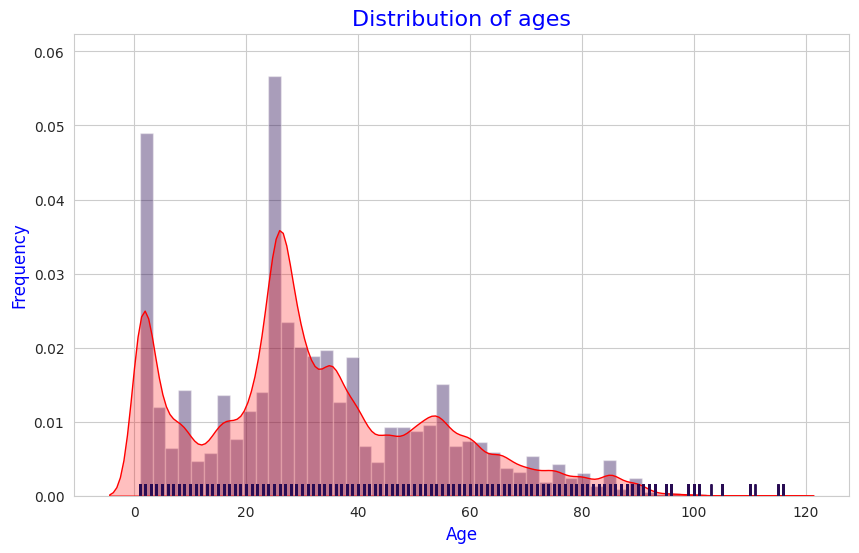

In [ ]:
#@title check the age distribution of photos

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.set_palette('inferno')
sns.distplot(labels_train['age'], rug=True, kde_kws={'shade':True, 'color':'r'})
plt.xlabel('Age', fontsize=12, color='b')
plt.ylabel('Frequency', fontsize=12, color='b')
plt.title('Distribution of ages', fontsize=16, color='b')
plt.show()

In [ ]:
#@title Defining necessary functions for neural network
def load_train(path):

    """
    It loads the train part of dataset from path
    """

    labels = pd.read_csv(path + 'images_filenames_labels_train_augmented.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        preprocessing_function=preprocess_input)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= None,
        x_col='filename',
        y_col='age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset = 'training',
        seed=12345)
    return train_gen_flow


def load_val(path):

    """
    It loads the validation/test part of dataset from path
    """
    labels = pd.read_csv(path + 'images_filenames_labels_train_augmented.csv')
    validation_datagen = ImageDataGenerator(
        validation_split=0.25,
        preprocessing_function=preprocess_input)
    val_gen_flow = validation_datagen.flow_from_dataframe(
    dataframe = labels,
    directory= None,
    x_col='filename',
    y_col='age',
    class_mode="raw",
    target_size=(224,224),
    batch_size=32,
    subset = "validation",
    seed=12345,
    )

    return val_gen_flow

def create_model(input_shape):

    """
    It defines the model
    """
    # Using ResNet50 architecture, with freezing top layers
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)

    #now adding our custom layers
    #without drop layer, neural networks can easily overfit
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling2D())

    #final layer, since we are doing regression we will add only one neuron (unit)
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=0.0003)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    print(model.summary())

    return model


def train_model(model, train_data, val_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None, checkpoint_dir='/content/drive/MyDrive/AgeEstimation_model_checkpoints'):
    """
    Trains the model with checkpoint saving after each epoch.
    """

    # Create the checkpoint directory if it doesn't exist
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Filepath for the checkpoint (will save the best weights per epoch)
    checkpoint_path = os.path.join(checkpoint_dir, 'model_epoch_{epoch:02d}_valLoss_{val_loss:.4f}.h5')

    # Create checkpoint callback
    checkpoint_cb = ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=False,     # Save entire model (architecture + weights)
        save_best_only=False,        # Save every epoch, not just the best one
        verbose=1
    )

    model.fit(
        train_data,
        validation_data=val_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1,
        callbacks=[checkpoint_cb]
    )

    return model

In [ ]:
#@title Calling functions
#assign data directory
path = '/content/1.1_age_input_output/input/'
#load training and testing (actually this is validation data set)
train_data = load_train(path)
val_data = load_val(path)


Found 175800 validated image filenames.
Found 58600 validated image filenames.


In [ ]:
#@title Build a model
model = create_model(input_shape = (224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [ ]:
#@title Train the model
model = train_model(model, train_data, val_data)

Epoch 1/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 7.3630 - mae: 7.3630
Epoch 1: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_01_valLoss_5.9568.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1901s 334ms/step - loss: 7.3628 - mae: 7.3628 - val_loss: 5.9568 - val_mae: 5.9568
Epoch 2/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 4.9710 - mae: 4.9710
Epoch 2: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_02_valLoss_4.8938.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1797s 327ms/step - loss: 4.9709 - mae: 4.9709 - val_loss: 4.8938 - val_mae: 4.8938
Epoch 3/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 4.3338 - mae: 4.3338
Epoch 3: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_03_valLoss_4.3006.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1788s 325ms/step - loss: 4.3337 - mae: 4.3337 - val_loss: 4.3006 - val_mae: 4.3006
Epoch 4/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 3.8589 - mae: 3.8589
Epoch 4: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_04_valLoss_4.1167.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1792s 326ms/step - loss: 3.8589 - mae: 3.8589 - val_loss: 4.1167 - val_mae: 4.1167
Epoch 5/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 3.4392 - mae: 3.4392
Epoch 5: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_05_valLoss_3.9247.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1820s 326ms/step - loss: 3.4392 - mae: 3.4392 - val_loss: 3.9247 - val_mae: 3.9247
Epoch 6/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 3.1000 - mae: 3.1000
Epoch 6: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_06_valLoss_3.5485.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1801s 328ms/step - loss: 3.1000 - mae: 3.1000 - val_loss: 3.5485 - val_mae: 3.5485
Epoch 7/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 2.8242 - mae: 2.8242
Epoch 7: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_07_valLoss_3.6359.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1846s 332ms/step - loss: 2.8242 - mae: 2.8242 - val_loss: 3.6359 - val_mae: 3.6359
Epoch 8/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 2.5937 - mae: 2.5937
Epoch 8: saving model to /content/drive/MyDrive/AgeEstimation_model_checkpoints/model_epoch_08_valLoss_3.4270.h5


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1796s 327ms/step - loss: 2.5937 - mae: 2.5937 - val_loss: 3.4270 - val_mae: 3.4270
Epoch 9/20
4388/5494 ━━━━━━━━━━━━━━━━━━━━ 5:26 295ms/step - loss: 2.3815 - mae: 2.3815

In [ ]:
#@title Resuming training from Checkpoint
import tensorflow as tf
import os

# Path to your last checkpoint (.h5 file)
last_checkpoint_path = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/model_epoch_14_valLoss_2.7084.keras"

# Load model from the last checkpoint
model = tf.keras.models.load_model(last_checkpoint_path, compile=False)

# Recompile the model (important to continue training)
# Use the same optimizer and loss you used before
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='mae',
    metrics=['mae']
)

# Directory to save new checkpoints in `.keras` format
new_checkpoint_dir = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras"
os.makedirs(new_checkpoint_dir, exist_ok=True)

# New checkpoint callback in `.keras` format
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(new_checkpoint_dir, "model_epoch_{epoch:02d}_valLoss_{val_loss:.4f}.keras"),
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False
)

# Early stopping (optional)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Continue training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    initial_epoch=14,
    callbacks=[checkpoint_callback, early_stopping],
    verbose=1
)


Epoch 15/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1853s 326ms/step - loss: 1.6299 - mae: 1.6299 - val_loss: 2.5412 - val_mae: 2.5412
Epoch 16/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1738s 316ms/step - loss: 1.5520 - mae: 1.5520 - val_loss: 2.5235 - val_mae: 2.5235
Epoch 17/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1733s 315ms/step - loss: 1.4777 - mae: 1.4777 - val_loss: 2.4352 - val_mae: 2.4352
Epoch 18/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1774s 318ms/step - loss: 1.4467 - mae: 1.4467 - val_loss: 2.4664 - val_mae: 2.4664
Epoch 19/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1744s 317ms/step - loss: 1.3852 - mae: 1.3852 - val_loss: 2.3506 - val_mae: 2.3506
Epoch 20/20
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 1743s 317ms/step - loss: 1.3364 - mae: 1.3364 - val_loss: 2.2699 - val_mae: 2.2699


In [ ]:
#@title Testing the age estimation model on test set csv file
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the trained model
model_path = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/model_epoch_20_valLoss_2.2699.keras"
model = tf.keras.models.load_model(model_path, compile=False)

# Directory containing test images
test_dir = "/content/content/combined_faces"

# Function to preprocess a single image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Loop over all images and make predictions
results = []
for filename in os.listdir(test_dir):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_dir, filename)
        img_array = load_and_preprocess_image(img_path)
        predicted_age = model.predict(img_array, verbose=0)[0][0]
        results.append((filename, predicted_age))
        print(f"Image: {filename} → Predicted Age: {predicted_age:.2f}")

# Save predictions to CSV
import pandas as pd
results_df = pd.DataFrame(results, columns=["filename", "predicted_age"])
results_df.to_csv("/content/age_predictions.csv", index=False)
print("\n✅ Predictions saved to /content/age_predictions.csv")


Streaming output truncated to the last 5000 lines.
Image: 60_317.jpg → Predicted Age: 65.54
Image: 27_62.jpg → Predicted Age: 26.53
Image: 31_317.jpg → Predicted Age: 30.17
Image: 24_601.jpg → Predicted Age: 27.33
Image: 50_71.jpg → Predicted Age: 58.63
Image: 30_710.jpg → Predicted Age: 28.93
Image: 68_103.jpg → Predicted Age: 61.37
Image: 8_210.jpg → Predicted Age: 10.08
Image: 12_79.jpg → Predicted Age: 26.04
Image: 2_867.jpg → Predicted Age: 4.47
Image: 49_42.jpg → Predicted Age: 51.85
Image: 28_929.jpg → Predicted Age: 24.46
Image: 73_75.jpg → Predicted Age: 36.79
Image: 45_421.jpg → Predicted Age: 57.83
Image: 67_96.jpg → Predicted Age: 61.52
Image: 92_15.jpg → Predicted Age: 69.53
Image: 24_60.jpg → Predicted Age: 24.29
Image: 27_184.jpg → Predicted Age: 27.95
Image: 24_258.jpg → Predicted Age: 25.02
Image: 39_210.jpg → Predicted Age: 34.01
Image: 26_2313.jpg → Predicted Age: 26.55
Image: 63_89.jpg → Predicted Age: 39.90
Image: 74_30.jpg → Predicted Age: 63.78
Image: 52_332.jpg 

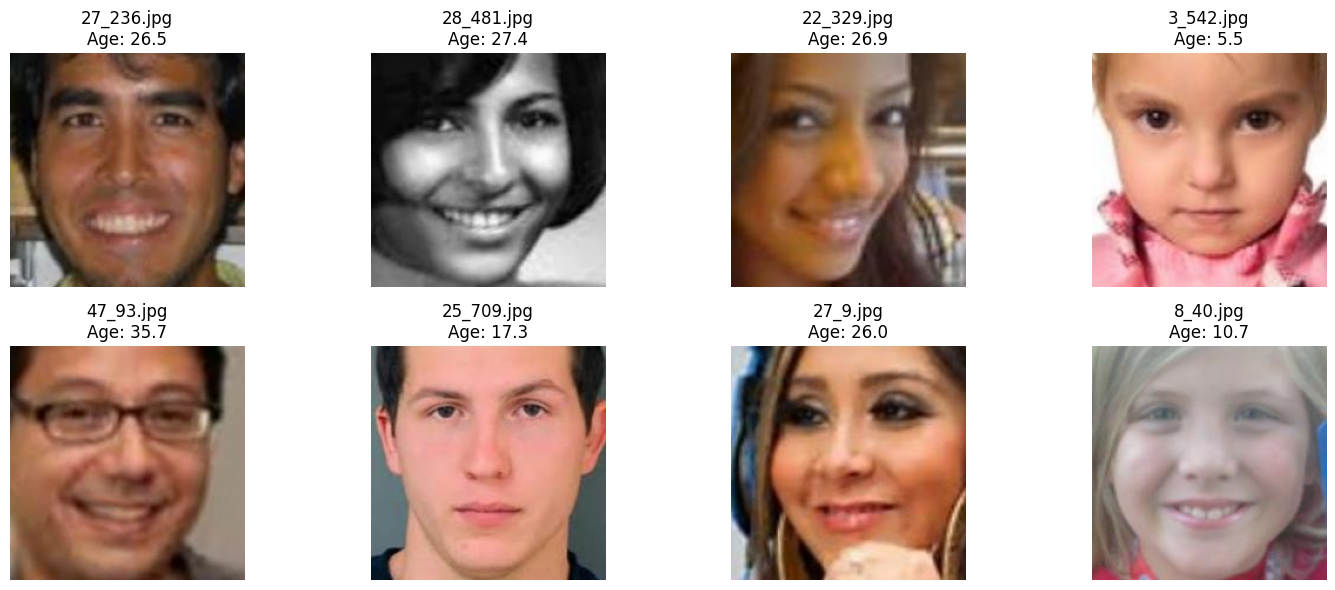

In [ ]:
#@title Testing the age estimation model on test set images
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the trained model
model_path = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/model_epoch_20_valLoss_2.2699.keras"
model = tf.keras.models.load_model(model_path, compile=False)

# Directory containing test images
test_dir = "/content/content/combined_faces"

# Function to preprocess a single image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Get a random batch of test images
all_images = [f for f in os.listdir(test_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
batch_size = 8  # Number of images to display
sample_images = random.sample(all_images, min(batch_size, len(all_images)))

# Predict ages & plot results
plt.figure(figsize=(15, 6))
for i, filename in enumerate(sample_images):
    img_path = os.path.join(test_dir, filename)
    img_array = load_and_preprocess_image(img_path)
    predicted_age = model.predict(img_array, verbose=0)[0][0]

    # Display image
    plt.subplot(2, batch_size // 2, i + 1)
    img_disp = image.load_img(img_path)
    plt.imshow(img_disp)
    plt.axis("off")
    plt.title(f"{filename}\nAge: {predicted_age:.1f}")

plt.tight_layout()
plt.show()


✅ Setup complete. All libraries are installed.
   - TensorFlow Version: 2.19.0
   - Keras Version: 3.10.0

✅ Files configured successfully:
   - Model Path: /content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/model_epoch_20_valLoss_2.2699.keras
   - Image A Path: /content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/GettyImages-83691852.webp
   - Image B Path: /content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/231206082811-angelina-jolie-0426-restricted.jpg
⚙️ Age model input shape set to: (224, 224)
🧠 Loading custom age model from: /content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/model_epoch_20_valLoss_2.2699.keras
✅ Custom age model loaded successfully.

🔎 Detecting faces with MediaPipe...
✅ Face detection complete.

🔎 Estimating ages with custom model...
   - Estimated Age for Image A: 17.0
   - Estimated Age for Image B: 57.9

🔄 Performing age-invariant face verification...
1/1 ━━━━━━━

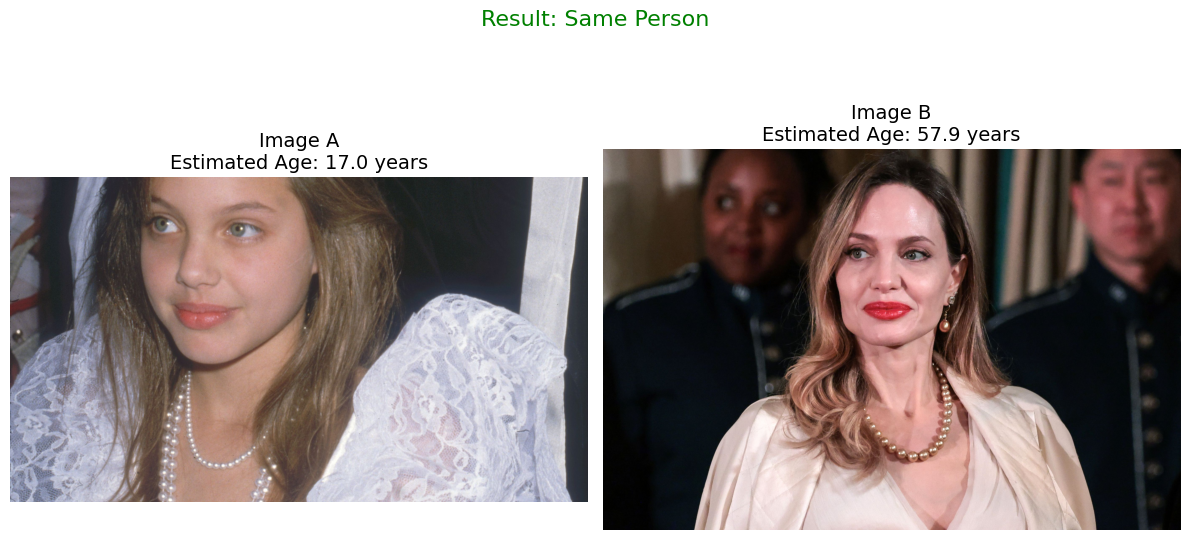

In [ ]:
# ==============================================================================
#@title  Age-Invariant Face Verification System Pipeline
# ==============================================================================
#
#  This script provides a stable and conflict-free solution by using a modern,
#  fully Keras 3-compatible pipeline:
#
#  1. Keras 3 / TensorFlow: To load and run your custom age estimation model.
#  2. MediaPipe: A lightweight and modern library for high-performance face
#     detection.
#  3. Keras-FaceNet: A Keras-native implementation of the powerful FaceNet model
#     for face verification, ensuring no dependency conflicts.
#
#  Instructions:
#  1. Run the "Setup and Installation" cell.
#  2. Run the "Upload Your Files" cell and upload your .keras age model and
#     the two images you want to compare.
#  3. The script will automatically detect your files.
#  4. Run the remaining cells to see the results.
#
# ==============================================================================

# 1. Setup and Installation
# ------------------------------------------------------------------------------
# Install the required libraries. We use modern, compatible versions.
# ------------------------------------------------------------------------------
!pip install tensorflow keras --upgrade
!pip install mediapipe
!pip install keras-facenet

import os
import cv2
import numpy as np
import tensorflow as tf
import keras
import mediapipe as mp
from keras_facenet import FaceNet
from google.colab import files
import matplotlib.pyplot as plt

print("✅ Setup complete. All libraries are installed.")
print(f"   - TensorFlow Version: {tf.__version__}")
print(f"   - Keras Version: {keras.__version__}")



# 2. Config Files Path
# ------------------------------------------------------------------------------
# Add the Path for the age estimation model and two images.
# ------------------------------------------------------------------------------
AGE_MODEL_PATH = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/model_epoch_20_valLoss_2.2699.keras"
IMAGE_A_PATH = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/GettyImages-83691852.webp"
IMAGE_B_PATH = "/content/drive/MyDrive/AgeEstimation_model_checkpoints_keras/face_age_match/231206082811-angelina-jolie-0426-restricted.jpg"
print("\n✅ Files configured successfully:")
print(f"   - Model Path: {AGE_MODEL_PATH}")
print(f"   - Image A Path: {IMAGE_A_PATH}")
print(f"   - Image B Path: {IMAGE_B_PATH}")


# 3. Configuration
# ------------------------------------------------------------------------------
# This section defines the input shape for your age model.
# ------------------------------------------------------------------------------
AGE_MODEL_INPUT_SHAPE = (224, 224) # The image size your model was trained on (height, width)
print(f"⚙️ Age model input shape set to: {AGE_MODEL_INPUT_SHAPE}")


# 4. Helper Functions (Detection, Preprocessing, and Visualization)
# ------------------------------------------------------------------------------
# These functions will handle loading models, detecting faces with MediaPipe,
# preprocessing images, and displaying the results.
# ------------------------------------------------------------------------------

def load_age_model(model_path):
    """
    Loads the custom .keras age estimation model in a Keras 3 environment.
    """
    if not (model_path and os.path.exists(model_path)):
        print(f"❌ Error: Model file not found at '{model_path}'.")
        return None
    try:
        print(f"🧠 Loading custom age model from: {model_path}")
        model = keras.models.load_model(model_path, compile=False)
        print("✅ Custom age model loaded successfully.")
        return model
    except Exception as e:
        print(f"❌ An error occurred while loading the Keras model: {e}")
        return None

def detect_and_crop_face_mediapipe(image_path):
    """
    Detects a face in an image using MediaPipe and returns a cropped version.
    Returns the cropped face in RGB format.
    """
    mp_face_detection = mp.solutions.face_detection
    face_detector = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image from path: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_detector.process(img_rgb)

    if not results.detections:
        raise ValueError(f"No face detected in {os.path.basename(image_path)}.")

    detection = results.detections[0]
    bboxC = detection.location_data.relative_bounding_box
    ih, iw, _ = img.shape
    x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

    padding = 20
    x, y = max(0, x - padding), max(0, y - padding)
    w, h = w + (padding * 2), h + (padding * 2)

    face_crop_rgb = img_rgb[y:y+h, x:x+w]
    return face_crop_rgb


def preprocess_face_for_age_model(face_crop_rgb, target_size):
    """
    Preprocesses a cropped RGB face image for the age estimation model.
    """
    resized_face = cv2.resize(face_crop_rgb, (target_size[1], target_size[0]))
    preprocessed_face = tf.keras.applications.resnet50.preprocess_input(resized_face)
    return np.expand_dims(preprocessed_face, axis=0)


def display_results(img_a_path, img_b_path, age_a, age_b, is_match, distance, threshold):
    """
    Displays the input images side-by-side with their estimated ages and the
    final verification result.
    """
    img_a = cv2.imread(img_a_path)
    img_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
    img_b = cv2.imread(img_b_path)
    img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img_a)
    axes[0].set_title(f"Image A\nEstimated Age: {age_a:.1f} years", fontsize=14)
    axes[0].axis('off')
    axes[1].imshow(img_b)
    axes[1].set_title(f"Image B\nEstimated Age: {age_b:.1f} years", fontsize=14)
    axes[1].axis('off')

    # Create a dynamic title based on the verification result
    if is_match:
        title_text = "Result: Same Person"
        title_color = 'green'
    else:
        title_text = "Result: Different People"
        title_color = 'red'

    plt.suptitle(title_text, fontsize=16, color=title_color, y=1.02)
    plt.tight_layout()

    print("\n" + "="*50)
    print("          Face Verification Results")
    print("="*50)
    print(f"✅ VERIFIED: {is_match}")
    print(f"\n- Analysis Details:")
    print(f"  - Verification Library: Keras-FaceNet")
    print(f"  - Cosine Distance: {distance:.4f}")
    print(f"  - Dynamic Similarity Threshold: {threshold:.4f}")
    print(f"    (A distance score < {threshold} means a match)")
    print("="*50)
    plt.show()


# 5. Main Execution: Run the Full System
# ------------------------------------------------------------------------------
# This is the main block that executes the entire pipeline.
# ------------------------------------------------------------------------------

if all([AGE_MODEL_PATH, IMAGE_A_PATH, IMAGE_B_PATH]):
    age_model = load_age_model(AGE_MODEL_PATH)
    # Initialize the FaceNet model for verification
    facenet_embedder = FaceNet()

    if age_model:
        try:
            # --- Step 1: Detect and Crop Faces using MediaPipe ---
            print("\n🔎 Detecting faces with MediaPipe...")
            face_a_crop = detect_and_crop_face_mediapipe(IMAGE_A_PATH)
            face_b_crop = detect_and_crop_face_mediapipe(IMAGE_B_PATH)
            print("✅ Face detection complete.")

            # --- Step 2: Estimate Age for each face using your Keras 3 model ---
            print("\n🔎 Estimating ages with custom model...")
            preprocessed_face_a = preprocess_face_for_age_model(face_a_crop, AGE_MODEL_INPUT_SHAPE)
            estimated_age_a = age_model.predict(preprocessed_face_a, verbose=0)[0][0]
            print(f"   - Estimated Age for Image A: {estimated_age_a:.1f}")

            preprocessed_face_b = preprocess_face_for_age_model(face_b_crop, AGE_MODEL_INPUT_SHAPE)
            estimated_age_b = age_model.predict(preprocessed_face_b, verbose=0)[0][0]
            print(f"   - Estimated Age for Image B: {estimated_age_b:.1f}")

            # --- Step 3: Perform Face Verification using Keras-FaceNet ---
            print("\n🔄 Performing age-invariant face verification...")
            face_a_batch = np.expand_dims(face_a_crop, axis=0)
            face_b_batch = np.expand_dims(face_b_crop, axis=0)
            embedding_a = facenet_embedder.embeddings(face_a_batch)[0]
            embedding_b = facenet_embedder.embeddings(face_b_batch)[0]
            from scipy.spatial.distance import cosine
            distance = cosine(embedding_a, embedding_b)
            print("✅ Verification complete.")

            # --- Step 4: Dynamic Threshold Logic ---
            # Start with a standard threshold and make it more lenient for large age gaps.
            age_difference = abs(estimated_age_a - estimated_age_b)
            dynamic_threshold = 0.40  # Standard threshold for FaceNet

            if age_difference > 35:
                dynamic_threshold = 0.65 # More lenient for very large gaps
            elif age_difference > 25:
                dynamic_threshold = 0.50 # Moderately lenient for large gaps

            is_match = distance < dynamic_threshold
            print(f"   - Age difference is {age_difference:.1f} years. Using dynamic threshold of {dynamic_threshold:.2f}.")


            # --- Step 5: Display Final Results ---
            display_results(
                img_a_path=IMAGE_A_PATH,
                img_b_path=IMAGE_B_PATH,
                age_a=estimated_age_a,
                age_b=estimated_age_b,
                is_match=is_match,
                distance=distance,
                threshold=dynamic_threshold
            )

        except ValueError as ve:
             print(f"\n❌ An error occurred, likely during face detection. Details: {ve}")
        except Exception as e:
            print(f"\n❌ An unexpected error occurred during execution: {e}")
else:
    print("\nSkipping execution because file configuration is incomplete. Please run cell #2 and upload the correct files.")

